In [32]:
# BIBLIOTECAS NECESSÁRIAS AO MODELO DE CLASSIFICAÇÃO
import matplotlib.pyplot as plt
import matplotlib as mpl    
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

# Baixando o conjunto de dados

In [33]:
# Dataset mnist
mnist= fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()
display('data','target', 'feature_names', 'DESCR', 'details', 
            'categories', 'url')

'data'

'target'

'feature_names'

'DESCR'

'details'

'categories'

'url'

In [34]:
# conferir os arrays
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [35]:
y.shape

(70000,)

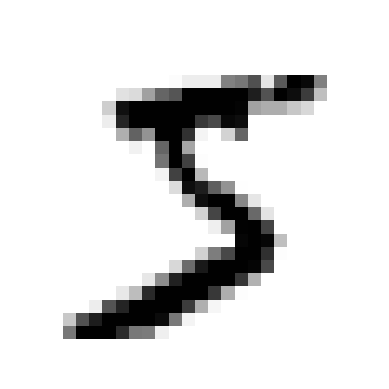

In [36]:
# verificando os imagens
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap ="binary" )
plt.axis("off")
plt.show()

In [37]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [38]:
y = y.astype(np.uint8)

In [39]:
# 3. DIVIDIR EM TREINO E TESTE
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Treinando um Classificador Binário

In [40]:
y_train_5 = (y_train == 5) # True para todos os 5s, False para todos os outros dígitos
y_test_5 = (y_test == 5)

In [41]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# Calculando a Curácia com validação cruzada
Implemetação do modelo 

In [42]:
# INICIALIZAR A LISTA DE ACURÁCIAS 
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

# Gerar os dados de treino e teste com validação cruzada estratificada
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(f"Acurácia: {n_correct / len(y_pred):.4f}")
    
print(f"\n{'='*50}")
print(f"Acurácia média: {np.mean(accuracies):.4f}")
print(f"Desvio padrão: {np.std(accuracies):.4f}")
print(f"{'='*50}")

Acurácia: 0.9669
Acurácia: 0.9163
Acurácia: 0.9678

Acurácia média: nan
Desvio padrão: nan


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type

In [43]:
# cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [44]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

In [45]:
# BaseEstimator
# CORRETO ✅
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
                             

array([0.91125, 0.90855, 0.90915])

In [46]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3,
                scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Matriz de confusão

In [47]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

In [48]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# Matriz de confusão
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
y_train_prefect_predictions = y_train_5  # Perfeitas previsões
confusion_matrix(y_train_5, y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precisão e revocação

In [ ]:
# Métricas precision, recall e F1
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
# recall score
recall_score(y_train_5, y_train_pred)


0.6511713705958311

In [ ]:
# F1 score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

Calculando F score

In [ ]:
f1_score(y_train_5, y_train_pred)


0.7325171197343847

In [ ]:
# chamndo a função decision_function
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred



array([ True])